### Investigate 3298 null values in response_correctness

In [1]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


In [2]:
dfFlt = load_df('dfFlt')

- Check correlations
- Missing at random?

###### Select the  3298 null values in response_correctness

In [3]:
rcNullDf = dfFlt.filter(F.col('response_correctness').isNull() )

In [4]:
display_single_val(rcNullDf)

,0
assignment_max_attempts,1
assignment_late_submission,False
assignment_attempt_number,1
is_manual_scoring_required,False
item_is_offline_scored,False
learner_attempt_status,fully scored
scoring_type_code,[unassigned]
response_correctness,None
is_deleted,False


- New Single values
  - Values
    - item_is_offline_scored = False (scored automatically)
    - scoring_type_code = "[unassigned]" (scored manually by human)
    - response_correctness = "None" (actually null)
  - "[unassigned]" is an unexpected value possibly indicating a automated scoring anomaly

###### Are these scores similar to population scores?

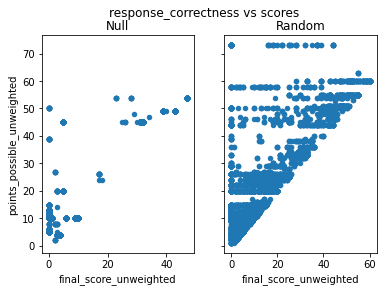

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

rcNullDf.toPandas().plot.scatter('final_score_unweighted', 'points_possible_unweighted', title='Null', ax=ax1)
get_random_sample(dfFlt).toPandas().plot.scatter('final_score_unweighted', 'points_possible_unweighted', title='Random', ax=ax2)
plt.suptitle('response_correctness vs scores')

plt.show()

- Score distribution similar to random sample of full dataset

###### Display Interval Statistics for null and all

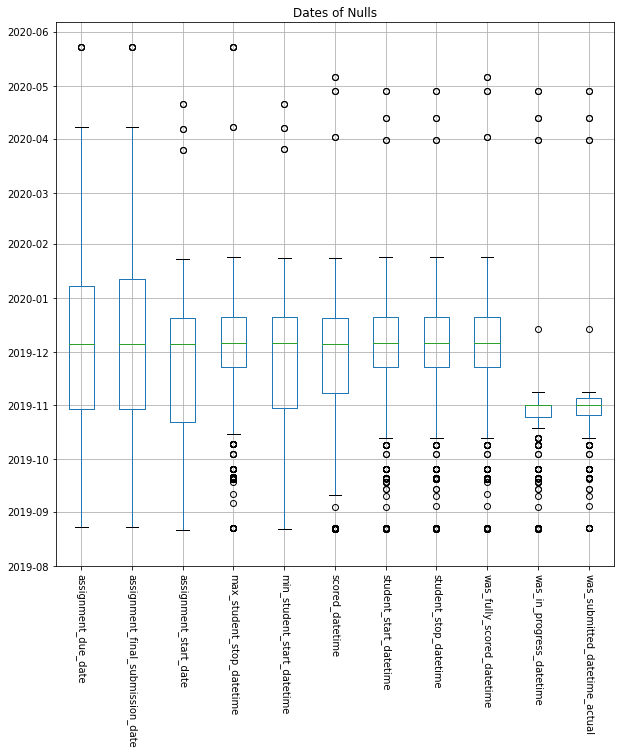

In [6]:
date_boxplot(rcNullDf, "Dates of Nulls")

- Population dates
  - Equal distribution between 8/2019 and 5/2020
- Sample dates
    - Majority of nulls between 10/2019 and 1/2020
      - max_student_stop_datetime
      - student_start_datetime
      - student_stop_datetime
      - was_fully_scored_datetime
    - was_in_progress_datetime and was_submitted_datetime_actual
      - between 10/2019 and 11/2019

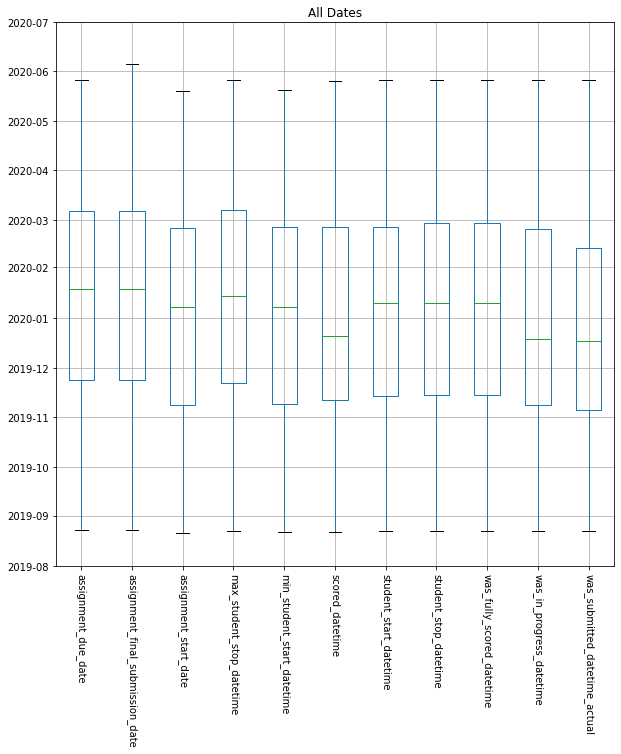

In [7]:
date_boxplot(get_random_sample(dfFlt), "All Dates")

###### Population response_correctness values

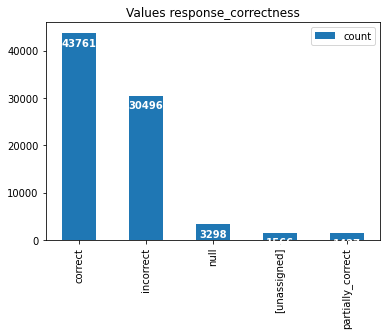

In [8]:
response_correctness_bar_plot(dfFlt, 'response_correctness')

- By definition response_correctness should be correlated to the final score
- Score possible and final points scale vary by question
- Need to convert to categorical to measure correlation

###### Cross tabulation of response_correctness to score converted to letter grade

In [9]:
score_bins   = [0,   59,  69,  79,  89, 100]
letter_grade = ['F', 'D', 'C', 'B', 'A']

pdDf =  dfFlt.withColumn(
    'percent_score',
    F.col('final_score_unweighted') / F.col('points_possible_unweighted') * 100
).select(
    'points_possible_unweighted',
    'final_score_unweighted',
    'response_correctness',
    'percent_score').toPandas()
pdDf['letter_grade'] = pd.cut(pdDf.percent_score, score_bins, labels=letter_grade)

pd.crosstab(pdDf.letter_grade, pdDf.response_correctness)

response_correctness,[unassigned],correct,incorrect,partially_correct
letter_grade,,,,
F,684,5908,11103,450
D,70,3171,1825,176
C,242,5074,1878,165
B,160,8118,1740,326
A,400,20525,888,269


- Uncorrelated scores and response_correctness values
  - 5908 correct when score says it's an failure (F)
  - 888 incorrect when scores says it's excellent (A)
  - Reviewed results with McGraw Hill and they recomend not using response_correctness
  - Will remove as suggested

In [10]:
finish_todo('Investigate 3298 null values in response_correctness')

add_todo('Remove response_correctness variable')